In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv(r"C:\Users\Mishra's PC\Desktop\Modular\ML_Data\Data\Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
x=df.drop(["sales"],axis=1)
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [9]:
y=df["sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression


In [15]:
model=LinearRegression()

In [16]:
model.fit(X_train, y_train)


LinearRegression()

In [19]:
test_pred=model.predict(X_test)
test_pred

array([15.64343813, 19.58078283, 11.42717781, 16.90494334,  9.17645232,
        7.01921001, 20.24548588, 17.27288092,  9.81362002, 19.15221858,
       12.36281849, 13.90086335, 13.74679921, 21.16322282, 18.31876004,
        9.96472602, 15.56312703,  7.73452007,  7.57314037, 20.32745421,
        7.79414911, 18.16308067, 24.57041484, 22.71055089,  8.01558318,
       12.65730219, 21.43661308,  8.04499619, 12.43159447, 12.40259255,
       10.70029092, 19.16776811, 10.10150532,  6.69083331, 17.24889776,
        7.79224406,  9.25952001,  8.31516806, 10.51963092, 10.67086792,
       12.88094679,  9.79344981, 10.20060813,  8.013982  , 11.54267429,
       10.07800983,  8.98583386, 16.21285502, 13.20750313, 20.70094692,
       12.42670309, 13.96572233, 17.55475937, 11.15936616, 12.58108647,
        5.54230087, 23.22486082, 12.58536565, 18.76366836, 15.15376302,
       15.15931391, 23.91773675,  6.78191588, 19.84529505, 13.86858162,
       21.07676645])

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [21]:
mae=mean_absolute_error(y_test,test_pred)
mae

1.236918849425931

In [22]:
mse=mean_squared_error(y_test,test_pred)
mse

2.348375242713827

In [24]:
rmse=np.sqrt(mse)
rmse


1.532440942651242

In [25]:

test_residuals=y_test-test_pred
test_residuals

37    -0.943438
109    0.219217
31     0.472822
89    -0.204943
66     0.323548
         ...   
183    2.282263
127    2.018084
53     1.354705
100   -2.168582
93     1.123234
Name: sales, Length: 66, dtype: float64

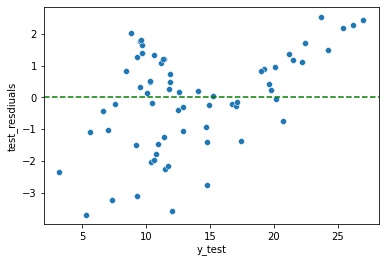

In [27]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.xlabel("y_test")
plt.ylabel("test_resdiuals")
plt.axhline(y=0,color="green",ls="--")

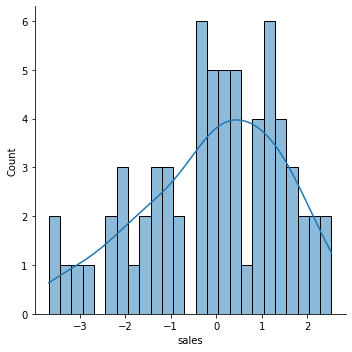

In [28]:
sns.displot(test_residuals,bins=25,kde=True)

In [29]:
model.coef_

array([ 0.04458371,  0.18525166, -0.00122463])

In [30]:
y_hat=model.predict(x)
y_hat

array([20.39404877, 12.42670309, 12.40259255, 17.55125343, 13.20750313,
       12.57240555, 11.82860768, 12.19325768,  3.98879262, 12.58108647,
        7.20937564, 17.23083292, 10.70029092,  8.96357595, 18.35555068,
       20.70094692, 12.88094679, 23.03105625, 10.07800983, 14.18887362,
       18.02072684, 14.7177465 ,  6.69083331, 16.49469776,  8.30689414,
       15.56312703, 15.00102436, 16.98777651, 19.30227203,  9.2792403 ,
       21.46585561, 11.42717781,  7.79224406, 18.76366836,  7.73452007,
       16.92717618, 23.22486082, 15.64343813, 10.04236137, 20.32745421,
       16.33818392, 17.24889776, 21.43661308, 13.96572233,  9.04456091,
       15.15376302,  9.00699972, 21.57848924, 16.21285502,  8.32259699,
       12.65730219,  9.46778071, 20.54198256, 19.84529505, 20.24548588,
       21.16322282,  8.69790163, 12.82637323, 21.75812867, 18.06489162,
        5.94709356, 22.71055089, 16.72441917, 13.26947812, 16.95587238,
        8.01558318,  9.17645232, 12.10173761, 18.88269153, 20.98

Text(0.5, 1.0, 'newspaper spend')

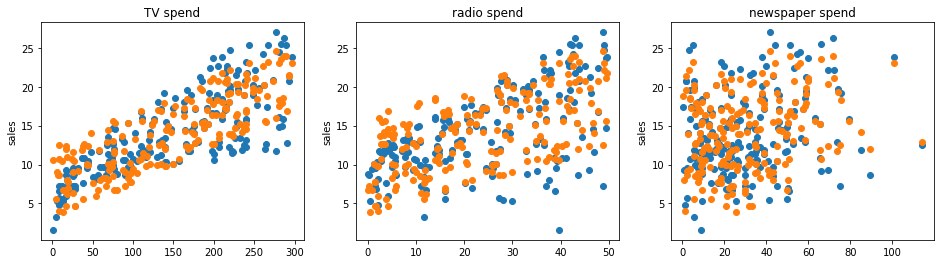

In [31]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,4))
axes[0].plot(df["TV"],df["sales"],"o")
axes[0].plot(df["TV"],y_hat,"o")
axes[0].set_ylabel("sales")
axes[0].set_title("TV spend")

axes[1].plot(df["radio"],df["sales"],"o")
axes[1].plot(df["radio"],y_hat,"o")
axes[1].set_ylabel("sales")
axes[1].set_title("radio spend")

axes[2].plot(df["newspaper"],df["sales"],"o")
axes[2].plot(df["newspaper"],y_hat,"o")
axes[2].set_ylabel("sales")
axes[2].set_title("newspaper spend")